# Step 0
The goal of this analysis is to use various patient data at time of hospitalization to identify at-risk patients who are more likely to not survive in the hospital. Medical negligence is a big problem in the modern world, with a Johns Hopkins study claiming that nearly 250,000 people die from medical accidents each year [1] . My main aim is to predict all possible causes of in-hospital mortality so that risks can be identified and worked on.

# Step 1.1
The selected dataset is a patient surivival prediction dataset from kaggle. ([link to dataset](https://www.kaggle.com/datasets/mitishaagarwal/patient)). This dataset is one that can be constantly updated, since multiple people are admitted in various hospitals daily. 
## Requirements
1. There is a possibility of finding versions of the data: Different hospitals will have different measurement metrics. These can be evaluated to refine the data.

2. Possibility of change in the data: As newer medical devices and measurement techniques are adopted, data will change drastically.

3. Possibility of update in data: People are hospitalized daily, so there is a constant stream of new data to work with.

4. Have at least two protected features: This dataset has varios protected features: including age, bmi, surgery type, and ethnicity



# Step 1.2
Since this is a classification problem, the ML metrics used to evaluate it will be accuracy, ROC curve and recall. Precision will be considered, but recall is more important in this case since it is important to identify all at risk patients. Some false positives are bearable.
The accuracy will simply be the percentage of correctly estimated values in the test set.

The ROC curve will estimate the benefit of this model over random guesses

The recall will provide the True Positive Rate (TPR), and give us the ratio of correctly identified positive instances.

Precision is the accuracy of positive predictions

# Step 1.3
Business metrics to evaluate this model can include:
1. Training time
2. Performance and investment
3. Time to market
4. Hardware cost
5. Cost of gathering data
6. Financial benefit of model

# Step 1.4

Software metrics to evaluate this model:

1. Number of code smells
2. Throughput
3. Turnaround time for predictions
4. Scalability
5. Modularity of code

# Step 2.1
The objective of the dataset is to predict whether patients will survive or not based on various patient-related factors.

This dataset was picked because of its good number of rows, and its inclusion of BMI, surgery type, condition details, and ICU location features. Each of these features provide a great deal of detail and consider most of the critical features needed for the objective of this analysis.

Important features in this dataset include:
1. Patient age
2. Patient BMI
3. Patient surgery type (elective or not)
4. Number of days spent in ICU
5. Heart rate
6. Respiratory rate
7. Presence of various medical conditions including: Cirrhosis, Lymphoma, etc.

# Step 2.1: Dataset quality radar

The following metrics were used to create a radar chart to estimate the quality of this dataset

1. Availability: This dataset is **accessible**, since hospitals record and upload data daily, will arrive at required **timelines**, since there is not much of an extra effort in gathering and moving the data, and it will be regularly updated. For **authorization**, this dataset will need to be released with permission by hospital authorities. Hospitals already have the right to use this data given by patients, but extra authorization can be obtained as necessary.

2. Usability: The **documentation** of this dataset is not very detailed, but it provides sufficient information to work with. This dataset is **credible**, since it is gathered through MIT’s GOSSIS (Global Open Source Severity of Illness Score). The **metadata** for this dataset is sufficient, but could be better.

3. Reliability: The **accuracy, credibility, consistency and integrity** of this data can be relied on because it is gathered through an MIT program. The completeness of this dataset seems good, especially with the number of features it covers. However, more features can be added over time after exploratory analyses. This data will also have high **auditability**, since it is open source.

4. Relevance: This data is highly relevant to the problem this analysis intends to solve. It provides data to predict patient survival based on various patient conditions

5. Presentation: The **readability** of this dataset is sufficient, however, some colum descriptions could be more detailed. The **structure** seems good too, all columns are organized properly, and categorical variables are seperated sufficiently.

The radar chart below visualizes the score given to each of these metrics out of a maximum score of 10.


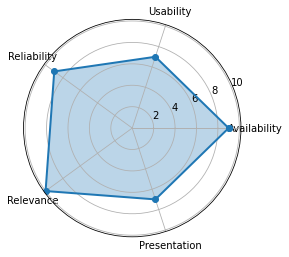

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
labels=np.array(['Availability', 'Usability', 'Reliability', 'Relevance', 'Presentation'])
stats=np.array([9, 7, 9, 10, 7])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.3)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

# Step 3

The features of the dataset are:

```
1. encounter_id: Patienty case ID
2. patient_id: Patient ID
3. hospital_id: Hospital ID
4. age: The age of the patient in admission
5. bmi: The body mass index of the person on unit admission
6. elective_surgery: Whether the patient was admitted to the hospital for an elective surgical operation
7. ethnicity: The common national or cultural tradition which the person belongs to
8. gender: Sex of the patient
9. height: The height of the person on unit admission
10. icu_admit_source: The location of the patient prior to being admitted to the unit
11. icu_id: A unique identifier for the unit to which the patient was admitted
12. icu_stay_type: Whether person was transferred into ICU or was staying there
13. icu_type: A classification which indicates the type of care the unit is capable of providing
14. pre_icu_los_days: The length of stay of the patient between hospital admission and unit admission
15. weight: The weight (body mass) of the person on unit admission
16. apache_2_diagnosis: The APACHE II diagnosis for the ICU admission. Apache (acronym for Acute Physiology and Chronic Health Evaluation) is used in ICUs as a diagnosis metric
17. apache_3j_diagnosis: The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission
18. apache_post_operative: The APACHE operative status; 1 for post-operative, 0 for non-operative
19. arf_apache: Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output < 410ml
20. gcs_eyes_apache: The eye opening component of the Glasgow Coma Scale measured during the first 24 hours
21. gcs_motor_apache: The motor component of the Glasgow Coma Scale measured during the first 24 hours
22. gcs_unable_apache: Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation
23. gcs_verbal_apache: The verbal component of the Glasgow Coma Scale measured during the first 24 hours 
24. heart_rate_apache: The heart rate measured during the first 24 hours
25. intubated_apache: Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score
26. map_apache: The mean arterial pressure measured during the first 24 hours
27. resprate_apache: The respiratory rate measured during the first 24 hours 
28. temp_apache: The temperature measured during the first 24 hours
29. ventilated_apache: Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation
30. d1_diasbp_max: The patient's highest diastolic blood pressure during the first 24 hours of their unit stay.
31. d1_diasbp_min: The patient's lower diastolic blood pressure during the first 24 hours of their unit stay.
32. d1_diasbp_noninvasive_max: BP measured noninvasively
33. d1_diasbp_noninvasive_min: BP measured noninvasively
34. d1_heartrate_max: The patient's highest heart rate during the first 24 hours of their unit stay
35. d1_heartrate_min: The patient's lowest heart rate during the first 24 hours of their unit stay
36. d1_mbp_max: The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or
37. d1_mbp_min: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured
38. d1_mbp_noninvasive_max: The patient's highest mean blood pressure during the first 24 hours of their unit stay non-invasively.
39. d1_mbp_nonvasive_min: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively
40. d1_resprate_max: The patient's highest respiratory rate during the first 24 hours of their unit stay
41. d1_resprate_min: The patient's lowest respiratory rate during the first 24 hours of their unit stay
42. d1_spo2_max: The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay
43. d1_spo2_min: The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay
44. d1_sysbp_max: The patient's highest systolic blood pressure during the first 24 hours of their unit stay
45. d1_sysbp_min: The patient's lower systolic blood pressure during the first 24 hours of their unit stay
46. d1_sysbp_noninvasive_max: The patient's highest systolic blood pressure during the first 24 hours of their unit stay noninvasive
47. d1_sysbp_noninvasive_min: The patient's lower systolic blood pressure during the first 24 hours of their unit stay noninvasive
48. d1_temp_max: The patient's highest core temperature during the first 24 hours of their unit stay
49. d1_temp_min: The patient's lower core temperature during the first 24 hours of their unit sta
50. h1_diasbp_max: The patient's highest diastolic blood pressure during the first hour of their unit stay
51. h1_diasbp_min: The patient's lowest diastolic blood pressure during the first hour of their unit stay
52. h1_diasbp_noninvasive_max: The patient's highest diastolic blood pressure during the first hour of their unit stay noninvasive
53. h1_diasbp_noninvasive_min: The patient's lowest diastolic blood pressure during the first hour of their unit stay noninvasive
54. h1_heartrate_max: The patient's highest heart rate during the first hour of their unit stay
55. h1_heartrate_min: The patient's lowest heart rate during the first hour of their unit stay
56. h1_mbp_max: The patient's highest mean blood pressure during the first hour of their unit stay
57. h1_mbp_min: The patient's lowest mean blood pressure during the first hour of their unit stay
58. and 59. Above two stats measure noninvasively
60. h1_resprate_max: The patient's highest respiratory rate during the first hour of their unit stay
61. h1_resprate_min: The patient's lowest respiratory rate during the first hour of their unit stay
62. h1_spo2_max: The patient's highest peripheral oxygen saturation during the first hour of their unit stay
63. h1_spo2_min: The patient's lowest peripheral oxygen saturation during the first hour of their unit stay
64. h1_sysbp_max: The patient's highest systolic blood pressure during the first hour of their unit stay
65. h1_sysbp_min: The patient's lowest systolic blood pressure during the first hour of their unit stay
66. and 67. Above to metrics measured noninvasively
68. d1_glucose_max: The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay
69. d1_glucose_min: The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay
70. d1_potassium_max: The highest potassium concentration of the patient in their serum or plasma during the first 24 hours of their unit stay
71. d1_potassium_min: The lowest potassium concentration of the patient in their serum or plasma during the first 24 hours of their unit stay
72. apache_4a_hospital_death_prob: The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score
73. apache_4a_icu_death_prob: The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score
74. aids: Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) 
75. cirrhosis: Whether the patient has a history of heavy alcohol use with portal hypertension and varices
76. diabetes_mellitus: Whether the patient has been diagnosed with diabetes, either juvenile or adult onset
77. hepatic_failure: Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding
78. immunosuppression: Whether the patient has their immune system suppressed within six months prior to ICU admission 
79. leukemia: Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic
80. lymphoma: Whether the patient has been diagnosed with non-Hodgkin lymphoma.
81. solid_tumor_with_metastasis: Whether the patient has been diagnosed with any solid tumor carcinoma
82. apache_3j_bodysystem: Admission diagnosis group for APACHE III
83. apache_2_bodysystem: Admission diagnosis group for APACHE II
84. **hospital_death**: Whether the patient died during this hospitalization. **This is the target variable**
```




In [29]:
# The features in the dataset are as follows

import pandas as pd

dataset = pd.read_csv('survival.csv')

dataset.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

# Step 4


# Step 5
Protected features in this dataset are: 
1. Age
2. BMI
3. Choice of elective surgery
4. All the apache report values
5. Various diagnoses, including cirrhosis and leukemia
6. Ethnicity


# Step 6

In [30]:
dataset = dataset.drop(["Unnamed: 83"], axis=1)

In [6]:
dataset.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [7]:
dataset.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [23]:
fig = px.histogram(dataset[['age', 'gender', 'hospital_death', 'bmi']].dropna(), x= "age", y = "hospital_death", color = 'gender',
                  marginal = 'box', hover_data = dataset[['age', 'gender', 'hospital_death', 'bmi']].columns)
fig.show()

In [27]:
dataset.isnull().sum(axis=0).sort_values(ascending=False)

d1_potassium_max            9053
d1_potassium_min            9053
h1_mbp_noninvasive_min      8455
h1_mbp_noninvasive_max      8455
apache_4a_icu_death_prob    7594
                            ... 
icu_stay_type                  0
height                         0
elective_surgery               0
bmi                            0
hospital_death                 0
Length: 80, dtype: int64

In [31]:
large_missing = dataset.isnull().sum(axis=0).sort_values(ascending=False)[dataset.isnull().sum(axis=0).sort_values(ascending=False) > 25000]

print("\nTotal features with more than", 25000, "missing values:", len(large_missing))

dataset.drop(large_missing.index.tolist() + ['encounter_id', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id'], 
              axis=1,
             inplace = True)
dataset


Total features with more than 25000 missing values: 0


,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,113.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,203.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Med-Surg ICU,0.073611,NaN,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,113.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,123.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [32]:
dataset = dataset[dataset[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
dataset

,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,113.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,203.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
5,67.0,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,100.0,301.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,113.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,123.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [34]:
numerical = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

categorical = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [37]:
not_numeric = dataset[numerical + categorical + ['hospital_death']].columns.tolist()
numeric_only = dataset.drop(not_numeric,axis=1).columns.tolist()
numeric_only

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_n

In [38]:
for col in numerical:
    dataset[col] = dataset[col].astype('Int64')
    
for col in numerical:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [40]:
dataset[numeric_only].isna().sum(axis=0).sort_values(ascending=False)

d1_potassium_min                 9053
d1_potassium_max                 9053
h1_mbp_noninvasive_min           8455
h1_mbp_noninvasive_max           8455
apache_4a_icu_death_prob         7594
apache_4a_hospital_death_prob    7594
h1_diasbp_noninvasive_max        6982
h1_diasbp_noninvasive_min        6982
h1_sysbp_noninvasive_min         6972
h1_sysbp_noninvasive_max         6972
d1_glucose_min                   5458
d1_glucose_max                   5458
h1_mbp_min                       4287
h1_mbp_max                       4287
h1_resprate_min                  4062
h1_resprate_max                  4062
age                              4055
h1_spo2_min                      3925
h1_spo2_max                      3925
temp_apache                      3884
h1_diasbp_min                    3388
h1_diasbp_max                    3388
h1_sysbp_max                     3379
h1_sysbp_min                     3379
h1_heartrate_min                 2621
h1_heartrate_max                 2621
d1_temp_min 

In [45]:
no_na = dataset.dropna(axis=0)

In [47]:
no_na[categorical].nunique()

ethnicity                6
gender                   2
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

In [52]:
processed_df = pd.get_dummies(no_na, prefix='cat-', prefix_sep='_', columns=categorical, drop_first=False)
processed_df.reset_index(drop = True, inplace = True)
processed_df

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,cat-_Cardiovascular,cat-_Gastrointestinal,cat-_Haematologic,cat-_Metabolic,cat-_Neurologic,cat-_Renal/Genitourinary,cat-_Respiratory,cat-_Trauma,cat-_Undefined Diagnoses,cat-_Undefined diagnoses
0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,...,1,0,0,0,0,0,0,0,0,0
1,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,...,0,0,0,0,0,0,1,0,0,0
2,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,...,0,0,0,0,1,0,0,0,0,0
3,72.0,28.257052,1,154.9,0.004861,67.8,303.0,1304.08,1,0,...,0,0,0,0,0,0,1,0,0,0
4,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56981,47.0,51.439842,1,195.0,0.033333,186.0,304.0,1406.01,1,0,...,0,1,0,0,0,0,0,0,0,0
56982,54.0,19.770448,0,177.8,0.025694,62.5,109.0,108.01,0,0,...,1,0,0,0,0,0,0,0,0,0
56983,75.0,23.060250,0,177.8,0.298611,72.9,113.0,501.06,0,0,...,1,0,0,0,0,0,0,0,0,0
56984,56.0,47.179671,0,183.0,0.120139,158.0,113.0,501.05,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
processed_df.columns = [x.lower() for x in processed_df.columns.tolist()]
processed_df = processed_df.loc[:,~processed_df.columns.duplicated()]

In [54]:
t = processed_df['arf_apache'].dtype
for col in processed_df.columns.tolist():
    if processed_df[col].values.dtype == 'uint8' or t == processed_df[col].values.dtype:
        processed_df[col] = processed_df[col].astype(int)

age                         float64
bmi                         float64
elective_surgery              int64
height                      float64
pre_icu_los_days            float64
                             ...   
cat-_trauma                   int64
cat-_haematologic             int64
cat-_neurologic               int64
cat-_renal/genitourinary      int64
cat-_undefined diagnoses      int64
Length: 104, dtype: object

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

# from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb
from xgboost import XGBClassifier


X = processed_df.drop(['hospital_death'], axis=1)
y = processed_df['hospital_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify = y)

In [125]:
import keras
from keras.models import Sequential
from keras.layers import Dense


# Neural network
model = Sequential()
model.add(Dense(103, input_dim=103, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dense(30, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [126]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.00001)

In [127]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [128]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=20, batch_size=64)

Epoch 1/20
624/624 [==============================] - 2s 3ms/step - loss: 1.5476 - accuracy: 0.8911 - val_loss: 0.6946 - val_accuracy: 0.9127
Epoch 2/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.9131 - val_loss: 0.6919 - val_accuracy: 0.9133
Epoch 3/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.9136 - val_loss: 0.6904 - val_accuracy: 0.9137
Epoch 4/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6899 - accuracy: 0.9138 - val_loss: 0.6892 - val_accuracy: 0.9139
Epoch 5/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6886 - accuracy: 0.9138 - val_loss: 0.6880 - val_accuracy: 0.9139
Epoch 6/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6875 - accuracy: 0.9139 - val_loss: 0.6869 - val_accuracy: 0.9138
Epoch 7/20
624/624 [==============================] - 2s 3ms/step - loss: 0.6864 - accuracy: 0.9140 - val_loss: 0.6859 - val_accuracy: 0.9138
Epoch 

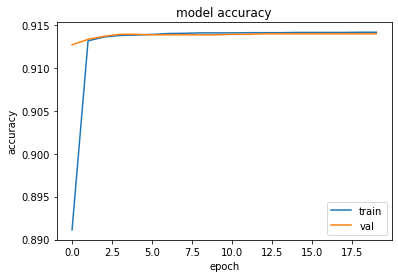

In [129]:
from tensorflow import keras
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

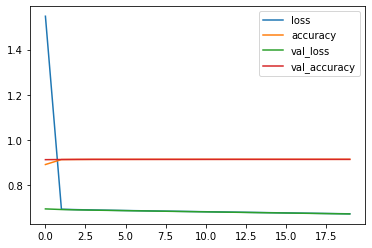

In [130]:
pd.DataFrame(history.history).plot()
plt.show()

In [139]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_test, y_test)],
    'verbose': 100,
}


# A parameter grid for XGBoost
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.1],
    'n_estimators': range(100, 500, 100),
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'max_depth': [5],
    "scale_pos_weight": [1]
}

xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    # silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf
)

xgb_model = gsearch.fit(X=X_train, y=y_train, **fit_params_of_xgb)
(gsearch.best_params_, gsearch.best_score_)

[0]	validation_0-auc:0.848269
Will train until validation_0-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.879961


({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 5,
  'min_child_weight': 1,
  'n_estimators': 100,
  'scale_pos_weight': 1,
  'subsample': 0.8},
 0.8811049523410902)

In [149]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
  
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    precision =  (tp/(tp+fp))
    recall    =  (tp/(tp+fn))
    f1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 score: {f1_score}")
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_hat) , 3)
    fpr, tpr, t = roc_curve(y_test, y_hat)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_hat)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                          specs=[ 
                                 [{}, {}],
                                 [{}, {}],
                                ],
                          subplot_titles=(
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        ))
    
    fig.append_trace(trace3,1,1)
    fig.append_trace(trace4,1,1)
    fig.append_trace(trace5,1,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [142]:
xgb_tuned = XGBClassifier(n_estimators=3000,
    objective='binary:logistic',
    booster="gbtree",
    learning_rate=0.01,
    scale_pos_weight=1,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.4,
    colsample_bytree=0.8,
    reg_alpha=0.08,
    n_jobs=-1)

xgb_tuned.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
y__hat = xgb_tuned.predict(X_test._get_numeric_data())

# Step 7
XGBoostClassifier was used to solve this problem. It was selected since XGB performs well with multiple variables, and it was able to circumvent the problems faced by the neural network (too low precision).

# Step 8


In [150]:
model_performance(xgb_tuned,y_test, y__hat)

Accuracy: 0.9272929340196537
Recall: 0.30292716133424097
Precision: 0.6701807228915663
F1 score: 0.41725269573370843


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Step 9

In [155]:
wrong_yhat = y__hat[y__hat != y_test]

In [165]:
pd.Series(wrong_yhat).value_counts()

0    1024
1     219
dtype: int64

In [166]:
# A lot of false negatives are present
wrong_indices = []

for i,x in enumerate(y__hat):
  if x != y_test.iloc[i] and x == 0:
    wrong_indices.append(i)

In [169]:
X_test.iloc[wrong_indices].describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,cat-_metabolic,cat-_musculoskeletal/skin,cat-_neurological,cat-_respiratory,cat-_sepsis,cat-_trauma,cat-_haematologic,cat-_neurologic,cat-_renal/genitourinary,cat-_undefined diagnoses
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,68.405273,28.720128,0.079102,168.927744,1.371888,81.778604,165.430664,455.527002,0.111328,0.040039,...,0.024414,0.005859,0.134766,0.203125,0.239258,0.032227,0.006836,0.134766,0.016602,0.003906
std,14.486614,9.048690,0.270029,10.908383,3.677337,26.503688,80.997756,384.951101,0.314692,0.196147,...,0.154406,0.076359,0.341640,0.402521,0.426839,0.176688,0.082437,0.341640,0.127835,0.062408
min,18.000000,14.844926,0.000000,137.200000,-0.215278,38.600000,101.000000,101.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,22.778415,0.000000,160.000000,0.035937,63.600000,113.000000,203.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.500000,26.920144,0.000000,170.000000,0.158681,77.100000,114.000000,403.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,32.807779,0.000000,177.800000,0.842882,94.195000,217.000000,501.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,64.948611,186.000000,308.000000,1904.010000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
X_test.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,cat-_metabolic,cat-_musculoskeletal/skin,cat-_neurological,cat-_respiratory,cat-_sepsis,cat-_trauma,cat-_haematologic,cat-_neurologic,cat-_renal/genitourinary,cat-_undefined diagnoses
count,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,...,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000,17096.000000
mean,62.671970,29.253446,0.161617,169.738410,0.831648,84.291245,181.469350,548.142584,0.184546,0.029890,...,0.088968,0.011816,0.128978,0.134768,0.147520,0.042232,0.007955,0.128978,0.026263,0.003217
std,16.604556,8.329119,0.368110,10.695225,2.495386,25.128758,85.293446,451.404616,0.387940,0.170289,...,0.284706,0.108059,0.335185,0.341486,0.354634,0.201124,0.088838,0.335185,0.159922,0.056630
min,16.000000,14.844926,0.000000,137.200000,-0.244444,38.600000,101.000000,101.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.661272,0.000000,162.600000,0.036806,66.900000,113.000000,204.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.660186,0.000000,170.100000,0.139583,80.285000,122.000000,409.020000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,33.101030,0.000000,177.800000,0.396528,97.500000,301.000000,703.030000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,73.022917,186.000000,308.000000,2201.050000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From above tables, we can see that elective surgery, sepsis and musculo-skeletal issues cause are predominant in the wrong predictions. These features should be given more weight for improving the model

# Step 10

['age',
 'bmi',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasi

In [182]:
females = X_test[X_test['cat-_f'] == 1]
males = X_test[X_test['cat-_m'] == 1]

In [183]:
yf = y_test[X_test['cat-_f'] == 1]
ym = y_test[X_test['cat-_m'] == 1]

In [184]:
yhf = xgb_tuned.predict(females._get_numeric_data())
model_performance(xgb_tuned,yf, yhf)

Accuracy: 0.9263117283950617
Recall: 0.29235382308845576
Precision: 0.6587837837837838
F1 score: 0.40498442367601245


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [185]:
yhm = xgb_tuned.predict(males._get_numeric_data())
model_performance(xgb_tuned,ym, yhm)

Accuracy: 0.9281115879828327
Recall: 0.3117206982543641
Precision: 0.6793478260869565
F1 score: 0.4273504273504274


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Above cells show that model performs fairly for both genders

# Step 11

In [187]:
try:
  import colab
  !pip install --upgrade pip
except:
  pass
!pip install tfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
from absl import logging
import urllib.request
import tempfile
import pandas as pd
logging.set_verbosity(logging.INFO)  # Set default logging level.

import tensorflow as tf
print('TensorFlow version: {}'.format(tf.__version__))
from tfx import v1 as tfx
print('TFX version: {}'.format(tfx.__version__))

TensorFlow version: 2.8.2


In [10]:

# Define the following variables:
# PIPELINE_NAME to give a name to your pipeline
# 2 => CODE HERE # 
PIPELINE_NAME = "pipeline"

# PIPELINE_ROOT for output directory to store artifacts generated from the pipeline.
# 3 => CODE HERE # 
PIPELINE_ROOT = os.path.join('pipelines', PIPELINE_NAME)

# METADATA_PATH for storing meta data
# 4 => CODE HERE # 
METADATA_PATH = os.path.join('metadata', PIPELINE_NAME, 'metadata.db')

# SERVING_MODEL_DIR to deploy your model
# 5 => CODE HERE # 
SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)

In [11]:
DATA_ROOT = tempfile.mkdtemp(prefix='tfx-data')  # Create a temporary directory.
_data_filepath = os.path.join(DATA_ROOT, "survival.csv")

In [13]:
_trainer_module_file = 'trainer.py'

In [ ]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils

from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

# define the list of features in _FEATURE_KEYS variable
# 8 => CODE HERE # 
_FEATURE_KEYS = list(X_train.columns)

# define your target variable _LABEL_KEY
# 9 => CODE HERE # 
_LABEL_KEY = 'hospital_death'

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()


def _build_keras_model() -> tf.keras.Model:
  """Creates a DNN Keras model for classifying penguin data.

  Returns:
    A Keras Model.
  """
  # The model below is built with Functional API, please refer to
  # https://www.tensorflow.org/guide/keras/overview for all API options.
  inputs = [keras.layers.Input(shape=(1,), name=f) for f in _FEATURE_KEYS]
  d = keras.layers.concatenate(inputs)
  # compelete your model architecture here
  # 10 => CODE HERE # 
  d = keras.layers.Dense(8, activation='relu')(d)
  d = keras.layers.Dense(8, activation='relu')(d)
  d = keras.layers.Dense(8, activation='relu')(d)

  outputs = keras.layers.Dense(3)(d)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[keras.metrics.SparseCategoricalAccuracy()])

  model.summary(print_fn=logging.info)
  return model


# TFX Trainer will call this function.
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = _build_keras_model()
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps)

  # The result of the training should be saved in `fn_args.serving_model_dir`
  # directory.
  model.save(fn_args.serving_model_dir, save_format='tf')

In [ ]:
def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
  """Creates a three component penguin pipeline with TFX."""
  # Brings data into the pipeline.
  example_gen = tfx.components.CsvExampleGen(input_base=data_root)

  # Uses user-provided Python function that trains a model.
  trainer = tfx.components.Trainer(
      module_file=module_file,
      examples=example_gen.outputs['examples'],
      train_args=tfx.proto.TrainArgs(num_steps=100),
      eval_args=tfx.proto.EvalArgs(num_steps=5))

  # Pushes the model to a filesystem destination.
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))

  # Following three components will be included in the pipeline.
  components = [
      example_gen,
      trainer,
      pusher,
  ]

  return tfx.dsl.Pipeline(
      pipeline_name=pipeline_name,
      pipeline_root=pipeline_root,
      metadata_connection_config=tfx.orchestration.metadata
      .sqlite_metadata_connection_config(metadata_path),
      components=components)

In [ ]:
tfx.orchestration.LocalDagRunner().run(
  _create_pipeline(
      pipeline_name=PIPELINE_NAME,
      pipeline_root=PIPELINE_ROOT,
      data_root=DATA_ROOT,
      module_file=_trainer_module_file,
      serving_model_dir=SERVING_MODEL_DIR,
      metadata_path=METADATA_PATH))

In [15]:
!find {'serving_model'}

serving_model
serving_model/pipeline
serving_model/pipeline/1652898012
serving_model/pipeline/1652898012/saved_model.pb
serving_model/pipeline/1652898012/variables
serving_model/pipeline/1652898012/variables/variables.index
serving_model/pipeline/1652898012/variables/variables.data-00000-of-00001
serving_model/pipeline/1652898012/assets
serving_model/pipeline/1652898012/keras_metadata.pb


# Step 12

## Improving software metrics
1. Ensure best practices to reduce code smells
2. Write efficient, vectorized code
3. Optimize model
4. Modularize code for adding to pipelines, writing GPU executable code

## Improving business metrics
1. Analyze tradeoff between performance and training time, choose optimum
2. Optimize model, use cloud delivery to select most cost effective method to deploy
3. Agile development to speed up release of product.




# References
[1] *CNBC*, "Medical errors third leading cause of death in America", [Online] https://www.cnbc.com/2018/02/22/medical-errors-third-leading-cause-of-death-in-america.html, Accessed On: June 6th, 2022